### Aqui buscamos responder as perguntas de negócio baseado nos dados

- Quais áreas do país mais fizeram pedidos?

- Qual categoria de produtos gerou a maior receita?
                         
- Quais categorias vendem mais?

- O número de vendas aumentou com o tempo?

- Como o Valor médio do pedido (AOV) mudou com o tempo?

- O quão preciso são as datas estimadas de entrega?

In [666]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
df = pd.read_parquet('../Dados/processado/df_limpo.parquet')
df.head()

,order_id,product_id,valor_final,categoria,customer_id,customer_state,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,RJ,2017-09-13 08:59:02,2017-09-29,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,SP,2017-04-26 10:53:06,2017-05-15,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,MG,2018-01-14 14:33:31,2018-02-05,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,SP,2018-08-08 10:00:35,2018-08-20,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,SP,2017-02-04 13:57:51,2017-03-17,2017-03-01 16:42:31


#### Quais áreas do país mais fizeram pedidos?

In [667]:
#Separamos a quantidade de pedidos em top3 / outros
estados = df['customer_state'].value_counts()

valores = estados.head(3)
valores['Outros'] = estados.iloc[3:].sum()
valores

customer_state
SP        42165
RJ        12826
MG        11790
Outros    35644
Name: count, dtype: int64

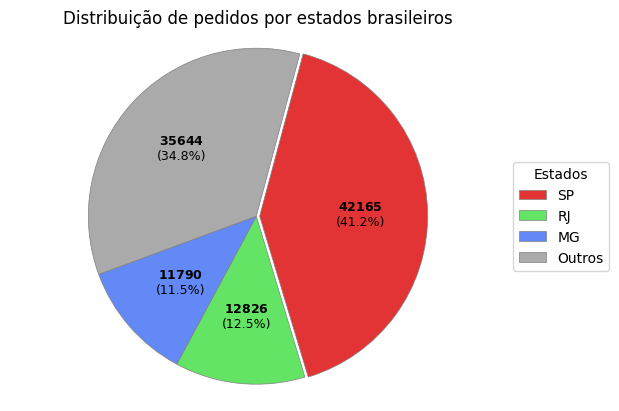

In [668]:
import matplotlib.pyplot as plt

total = valores.sum()
def func_pct(pct):
    quantidade = int(round(pct*total/100))
    return rf'$\mathbf{{{quantidade}}}$' + f'\n({pct:.1f}%)'



fig, ax = plt.subplots()
fig.patch.set_facecolor("#ffffff")
ax.set_facecolor("#ffffff")
ax.pie(valores,
       autopct=func_pct,
       startangle=75,
       explode=[0.02,0,0,0],
       colors=["#e23434","#64e464","#6289f5","#aaaaaa"],
       wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5},
        textprops={'fontsize': 9},
       counterclock=False)

ax.axis('equal')
ax.legend(
    valores.index,
    title="Estados",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.title('Distribuição de pedidos por estados brasileiros')
plt.show()

Os estados que mais vendem são:
- São Paulo (quase metade dos pedidos)
- Rio de Janeiro
- Minas gerais

### Qual categoria de produtos gerou a maior receita? E quais categorias vendem mais?

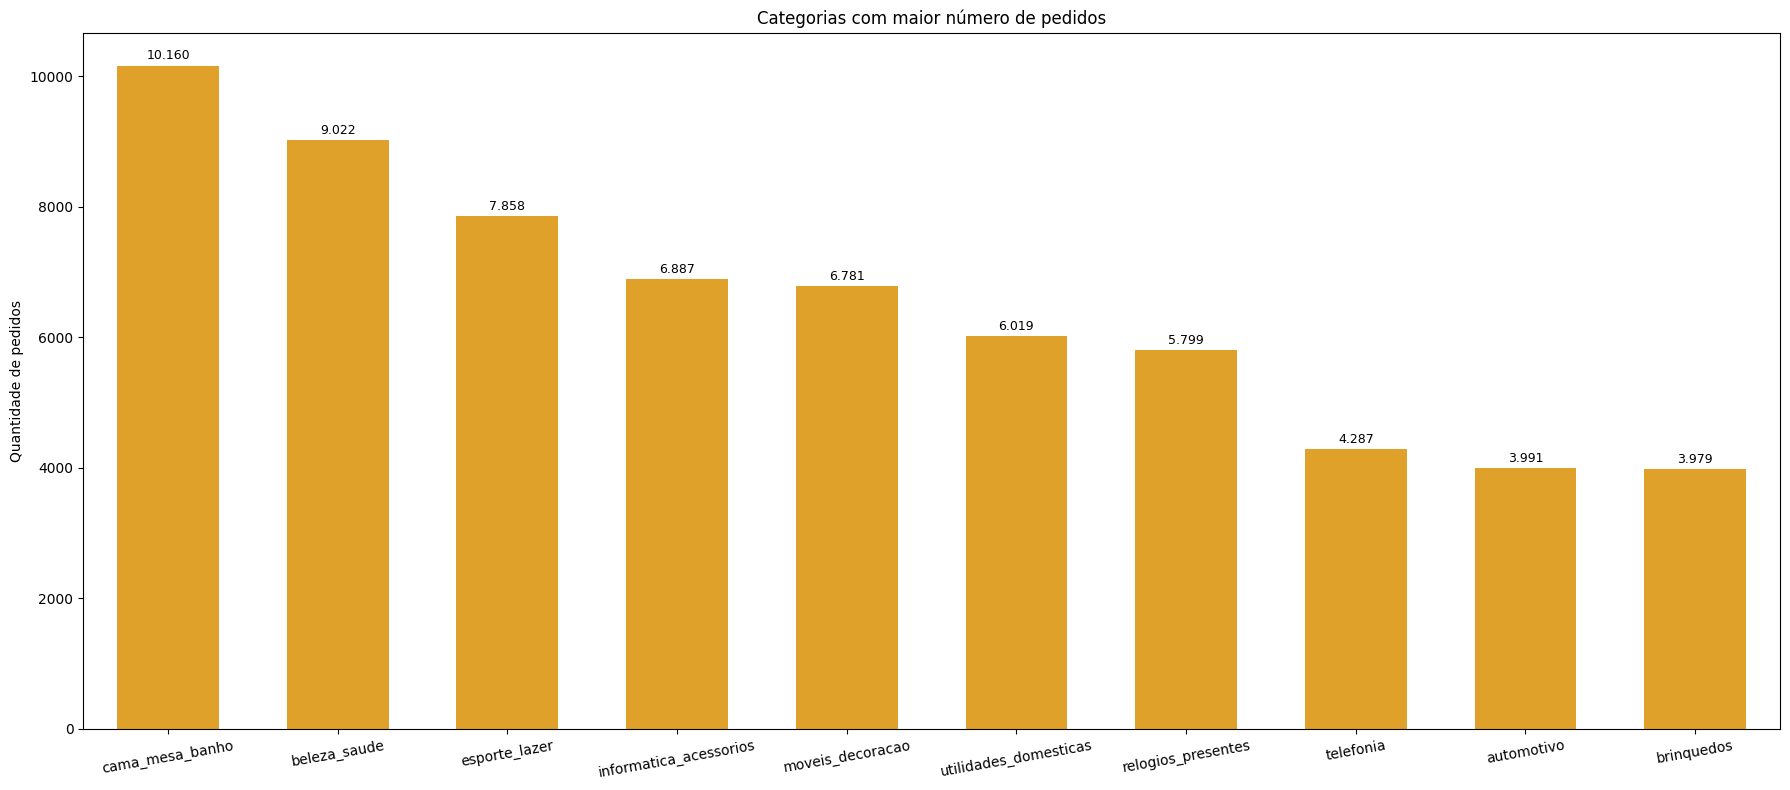

In [669]:
categorias = df['categoria'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(18, 8))

ax.bar(categorias.index,
       categorias.values,
       color="#e0a12b",
       width=0.6)

for i, v in enumerate(categorias):
    ax.text(i, v + 100, f'{v:,}'.replace(',','.'), ha='center', fontsize=9)
ax.set_title('Categorias com maior número de pedidos')
ax.set_ylabel('Quantidade de pedidos')    
plt.xticks(rotation=10)
ax.set_xlim(-0.5, len(categorias) - 0.5)
plt.tight_layout()
plt.show()

In [670]:
valor_categoria = df.groupby('categoria')['valor_final'].sum().sort_values(ascending=False).head(10)
valor_categoria

categoria
beleza_saude              1441248.07
relogios_presentes        1305541.61
cama_mesa_banho           1241681.72
esporte_lazer             1156656.48
informatica_acessorios    1059272.40
moveis_decoracao           902511.79
utilidades_domesticas      778397.77
cool_stuff                 719329.95
automotivo                 685384.32
ferramentas_jardim         584219.21
Name: valor_final, dtype: float64

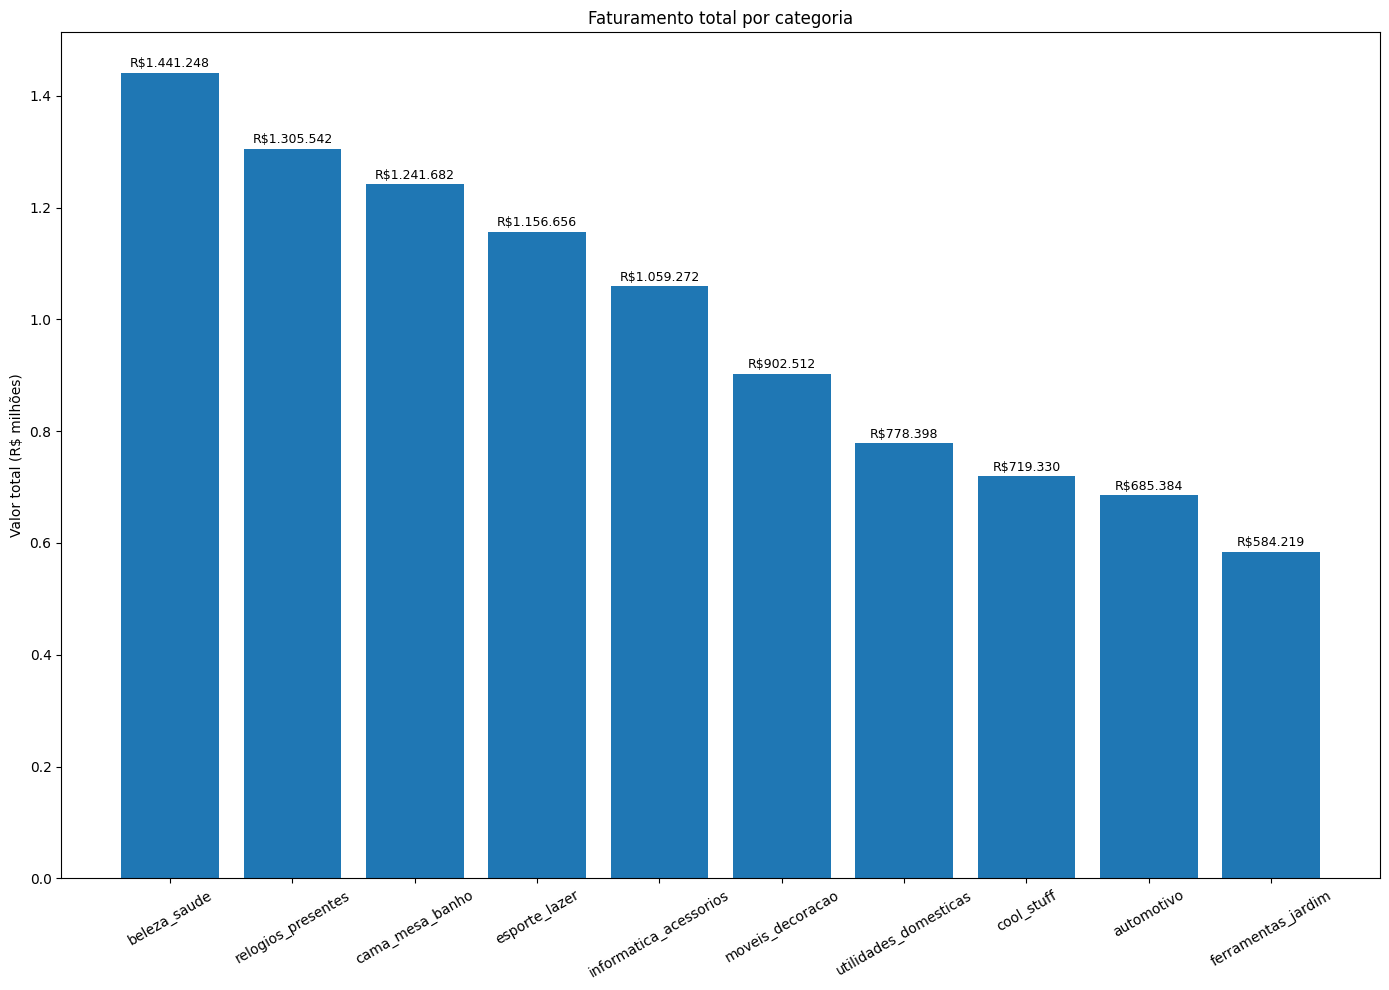

In [671]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(valor_categoria.index, valor_categoria.values)

ax.set_title('Faturamento total por categoria')
ax.set_ylabel('Valor total (R$ milhões)')
plt.xticks(rotation=30)
ax.yaxis.set_major_formatter(lambda x, _: f'{x/1_000_000:.1f}')

for i, v in enumerate(valor_categoria):
    ax.text(i, v + 10000, f'R${v:,.0f}'.replace(",", "."), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

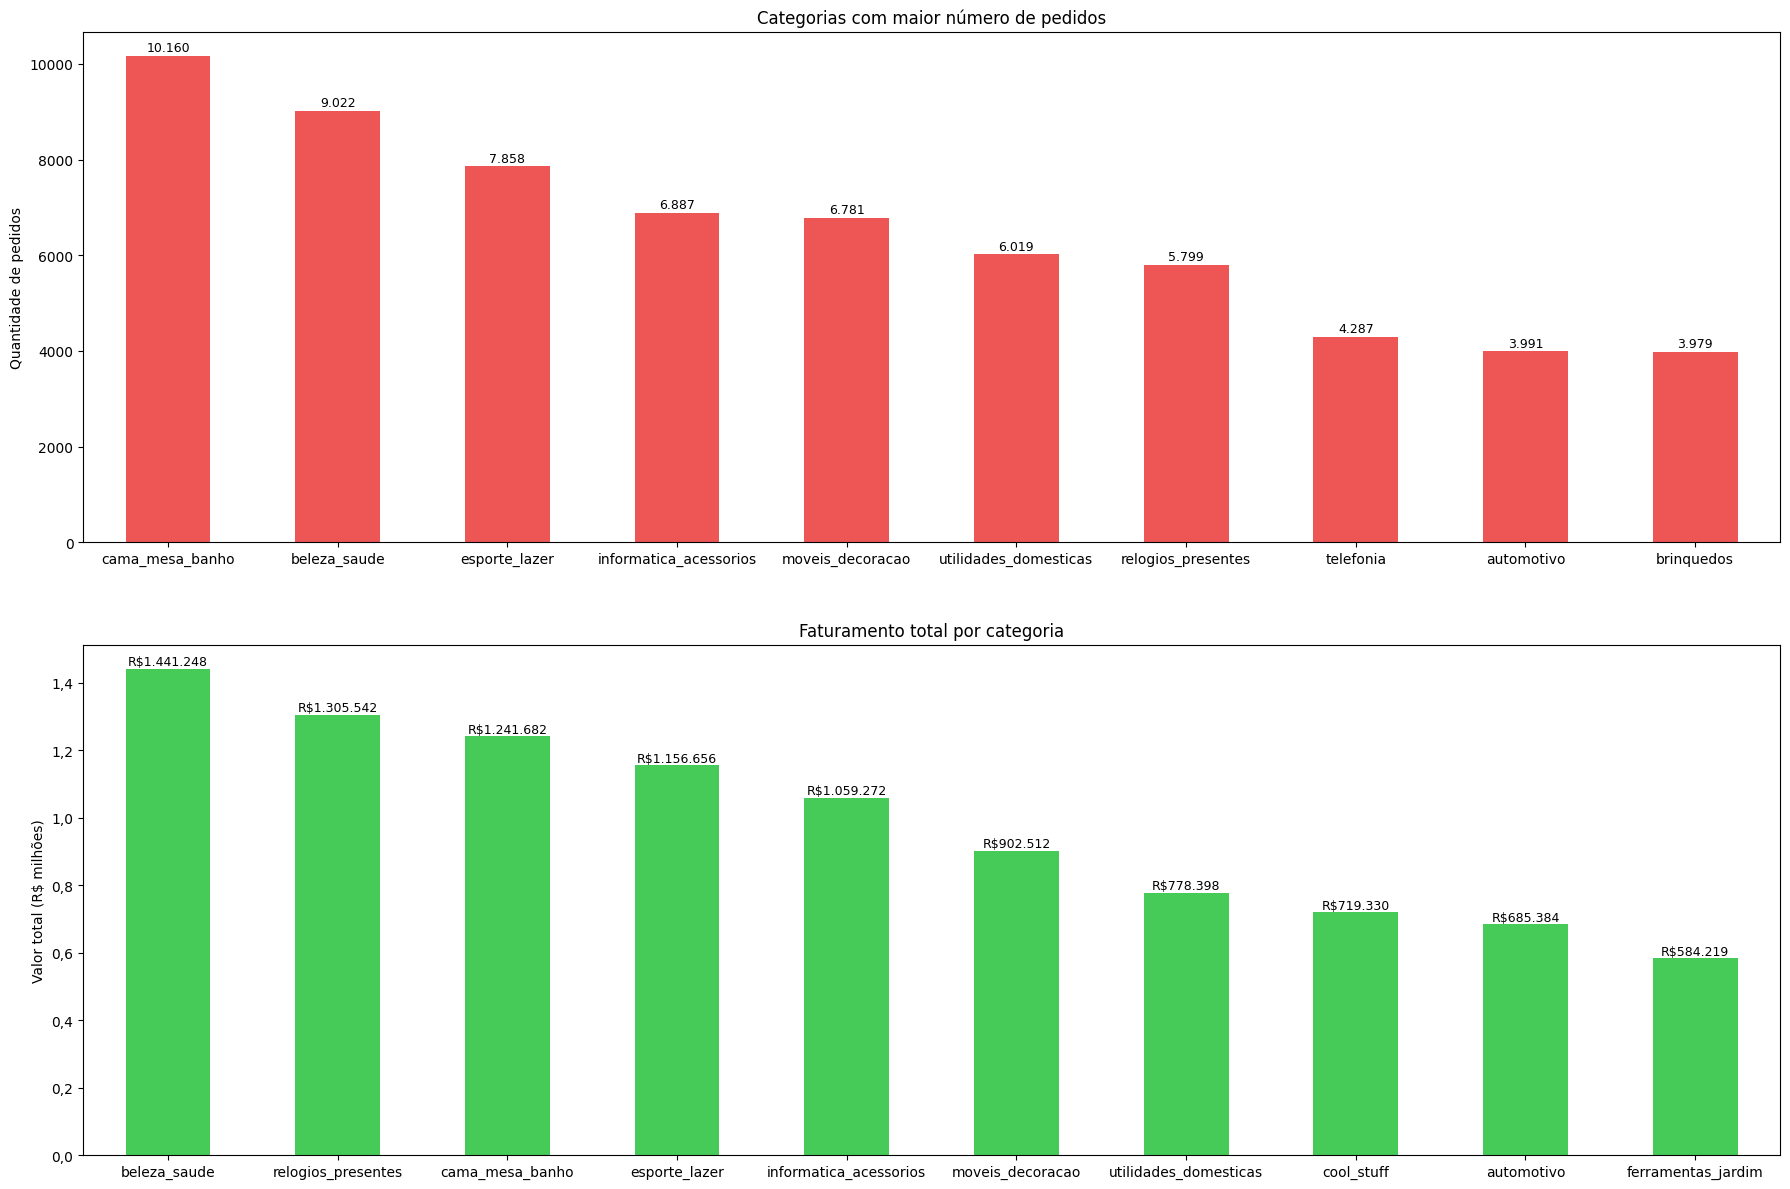

In [672]:
# Gráficos lado a lado para comparação
fig, ax = plt.subplots(2, 1, figsize=(18,12))

#Vendas

ax[0].bar(categorias.index,
       categorias.values,
       color="#ee5656",
       width=0.5)

for i, v in enumerate(categorias):
    ax[0].text(i, v + 100, f'{v:,}'.replace(',','.'), ha='center', fontsize=9)
ax[0].set_title('Categorias com maior número de pedidos')
ax[0].set_ylabel('Quantidade de pedidos')    
ax[0].set_xlim(-0.5, len(categorias) - 0.5)

#Renda
ax[1].bar(valor_categoria.index, 
          valor_categoria.values, 
          color = "#46ca58",
          width = 0.5)

ax[1].set_title('Faturamento total por categoria')
ax[1].set_ylabel('Valor total (R$ milhões)')
ax[1].yaxis.set_major_formatter(lambda x, _: f'{x/1_000_000:.1f}'.replace('.',','))
ax[1].set_xlim(-0.5, len(valor_categoria) - 0.5)

for i, v in enumerate(valor_categoria):
    ax[1].text(i, v + 10000, f'R${v:,.0f}'.replace(",", "."), ha='center', fontsize=9)


plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()

### O número de vendas aumentou com o tempo?

In [673]:
vendas_mes = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).size()
vendas_dia = df.groupby(df['order_purchase_timestamp'].dt.date).size()
vendas_dia.sort_values()

order_purchase_timestamp
2016-09-15       1
2016-12-23       1
2017-01-08       4
2017-01-07       4
2017-01-06       4
              ... 
2018-08-06     387
2017-11-26     401
2017-11-27     417
2017-11-25     508
2017-11-24    1212
Length: 612, dtype: int64

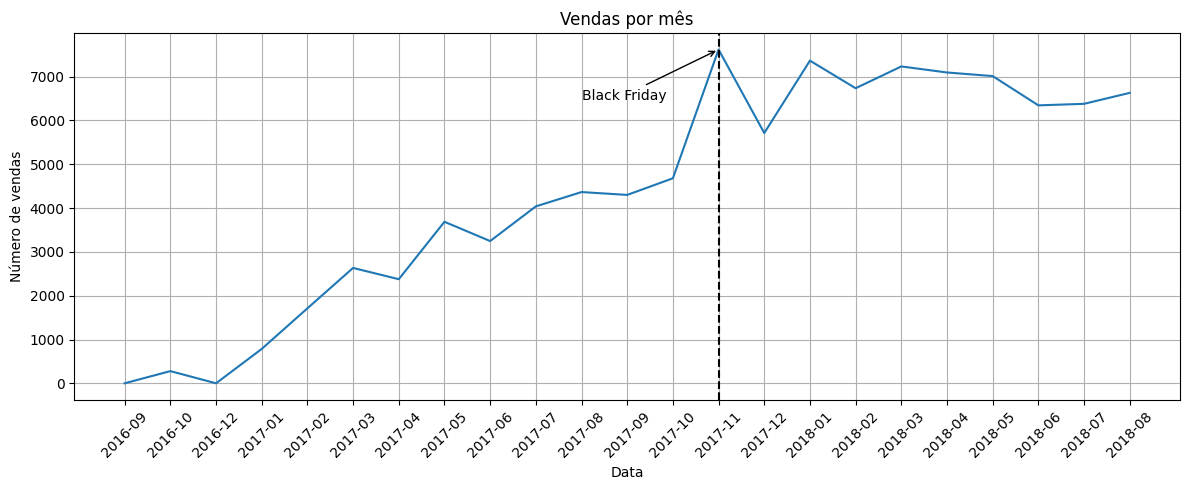

In [674]:
plt.figure(figsize=(12, 5))
plt.plot(vendas_mes.index.astype(str), 
         vendas_mes.values,)
plt.xlabel('Data')
plt.ylabel('Número de vendas')
plt.title('Vendas por mês')

data_black_friday = '2017-11'
plt.axvline(
    data_black_friday,
    linestyle='--',
    label='Mês da Black Friday',
    color='black'
)

plt.annotate(
    'Black Friday',
    xy=(data_black_friday, vendas_mes.loc[data_black_friday]),
    xytext=('2017-08', vendas_mes.max() * 0.85),
    arrowprops=dict(arrowstyle='->'),
)


plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

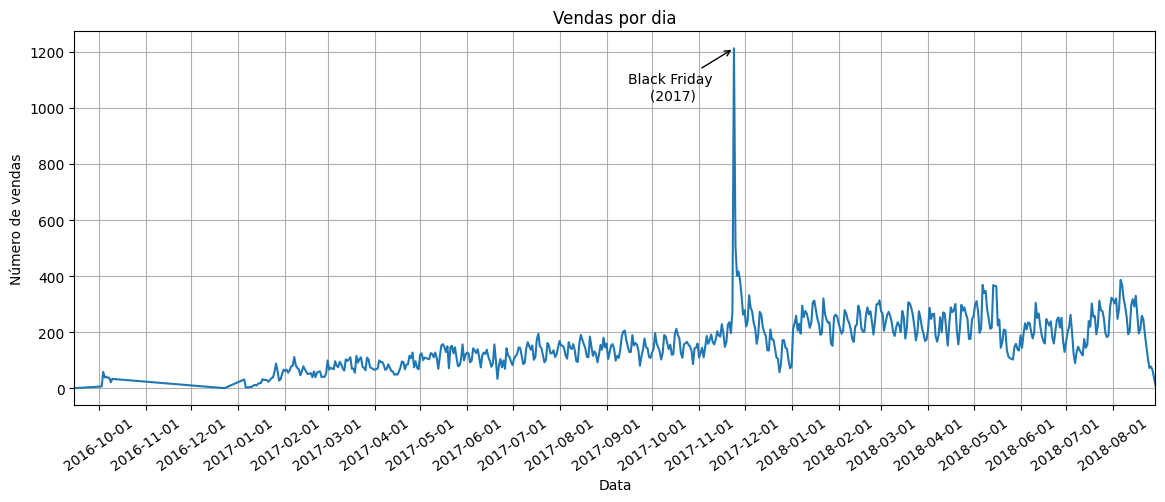

In [675]:
plt.figure(figsize=(12, 5))
plt.plot(vendas_dia.index, 
         vendas_dia.values,)
plt.xlabel('Data')
plt.ylabel('Número de vendas')
plt.title('Vendas por dia')

data_black_friday = pd.to_datetime('2017-11-24')
valor_bf = vendas_dia.loc[data_black_friday.date()]

plt.annotate(
    'Black Friday\n     (2017)',
    xy=(data_black_friday, valor_bf),
    xytext=(data_black_friday - pd.Timedelta(days=70), vendas_dia.max() * 0.85),
    arrowprops=dict(arrowstyle='->')
)

plt.xticks(rotation=35)
plt.tight_layout()
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlim(vendas_dia.index.min(),vendas_dia.index.max())
plt.show()

### Como o Valor médio do pedido (AOV) mudou com o tempo?

In [676]:
Aov_mensal = df['valor_final'].groupby(df['order_purchase_timestamp'].dt.to_period('M')).mean()
Aov_mensal

order_purchase_timestamp
2016-09    143.460000
2016-10    166.633190
2016-12     19.620000
2017-01    162.397924
2017-02    158.526780
2017-03    157.360786
2017-04    164.483333
2017-05    153.784970
2017-06    150.970539
2017-07    140.277206
2017-08    147.990917
2017-09    163.079202
2017-10    160.563705
2017-11    151.439627
2017-12    147.623584
2018-01    146.412315
2018-02    143.497462
2018-03    154.992841
2018-04    159.740402
2018-05    161.023469
2018-06    159.567690
2018-07    161.174107
2018-08    148.708562
Freq: M, Name: valor_final, dtype: float64

In [677]:
df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['order_id'].nunique()
#Vemos que só tem um pedido no mês 9 e no mês 12 de 2016

order_purchase_timestamp
2016-09       1
2016-10     265
2016-12       1
2017-01     750
2017-02    1653
2017-03    2546
2017-04    2303
2017-05    3546
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4150
2017-10    4478
2017-11    7289
2017-12    5513
2018-01    7069
2018-02    6555
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6099
2018-07    6159
2018-08    6351
Freq: M, Name: order_id, dtype: int64

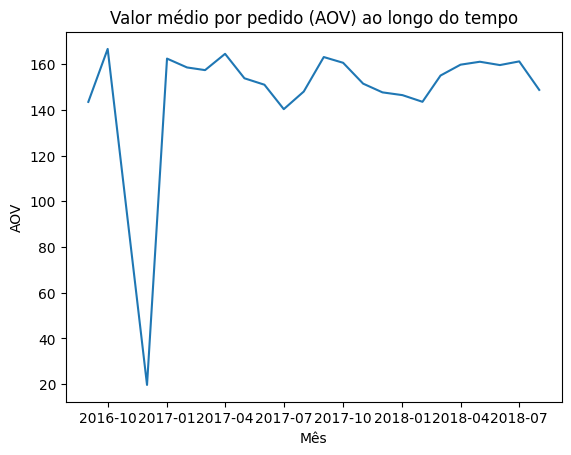

In [678]:
plt.figure()
plt.plot(Aov_mensal.index.to_timestamp(), Aov_mensal.values)
plt.xlabel('Mês')
plt.ylabel('AOV')
plt.title('Valor médio por pedido (AOV) ao longo do tempo')
plt.show()


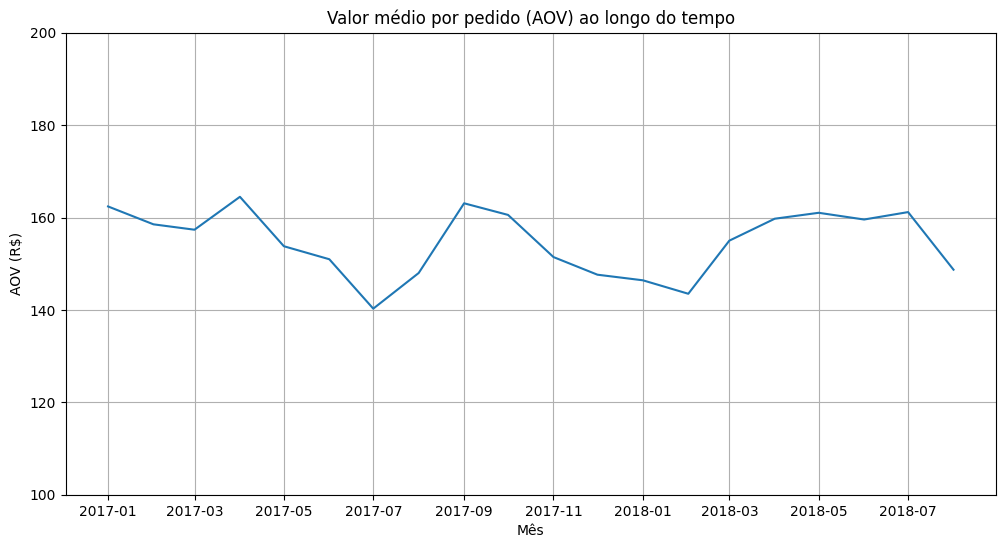

In [679]:
#Faremos o gráfico a partir do ano de 2017, para evitar a distorção de dezembro de 2016
plt.figure(figsize=(12,6))
plt.plot(Aov_mensal[Aov_mensal.index >= '2017-01'].index.to_timestamp(), Aov_mensal[Aov_mensal.index >= '2017-01'].values)

plt.xlabel('Mês')
plt.ylabel('AOV (R$)')
plt.title('Valor médio por pedido (AOV) ao longo do tempo')
plt.ylim(100, 200)
plt.grid()
plt.show()


In [680]:
df_aov = df.copy()
df_aov['mes'] = pd.to_datetime(df_aov['order_purchase_timestamp']).dt.to_period('M')
aov_categoria = (
    df_aov[['order_id', 'categoria', 'valor_final', 'order_purchase_timestamp','mes']]
    .groupby(['categoria','mes'])
    .agg(
        faturamento=('valor_final', 'sum'),
        pedidos=('order_id', 'nunique')
    )
)
aov_categoria['AOV'] = aov_categoria['faturamento'] / aov_categoria['pedidos']
aov_categoria = aov_categoria['AOV'].fillna(0)
aov_categoria

categoria                  mes    
agro_industria_e_comercio  2016-09      0.000000
                           2016-10      0.000000
                           2016-12      0.000000
                           2017-01     53.880000
                           2017-02     47.300000
                                         ...    
Desconhecido               2018-04    129.514306
                           2018-05    107.623514
                           2018-06    127.531818
                           2018-07    134.899524
                           2018-08     92.787586
Name: AOV, Length: 1702, dtype: float64

In [681]:
top4 = valor_categoria.nlargest(4).index
aov_top4 = aov_categoria.unstack(level=0)[top4]
aov_top4

categoria,beleza_saude,relogios_presentes,cama_mesa_banho,esporte_lazer
mes,,,,
2016-09,143.460000,0.000000,0.000000,0.000000
2016-10,116.285833,698.427500,121.316000,146.515294
2016-12,0.000000,0.000000,0.000000,0.000000
2017-01,174.718987,755.530000,107.851163,188.683333
2017-02,176.072168,360.131250,131.876500,138.208134
2017-03,155.073632,353.410000,124.920544,178.922378
2017-04,151.513095,283.619091,124.244069,146.617880
2017-05,200.209655,324.369833,120.497028,156.046680
2017-06,158.132446,258.599204,123.865648,155.215265


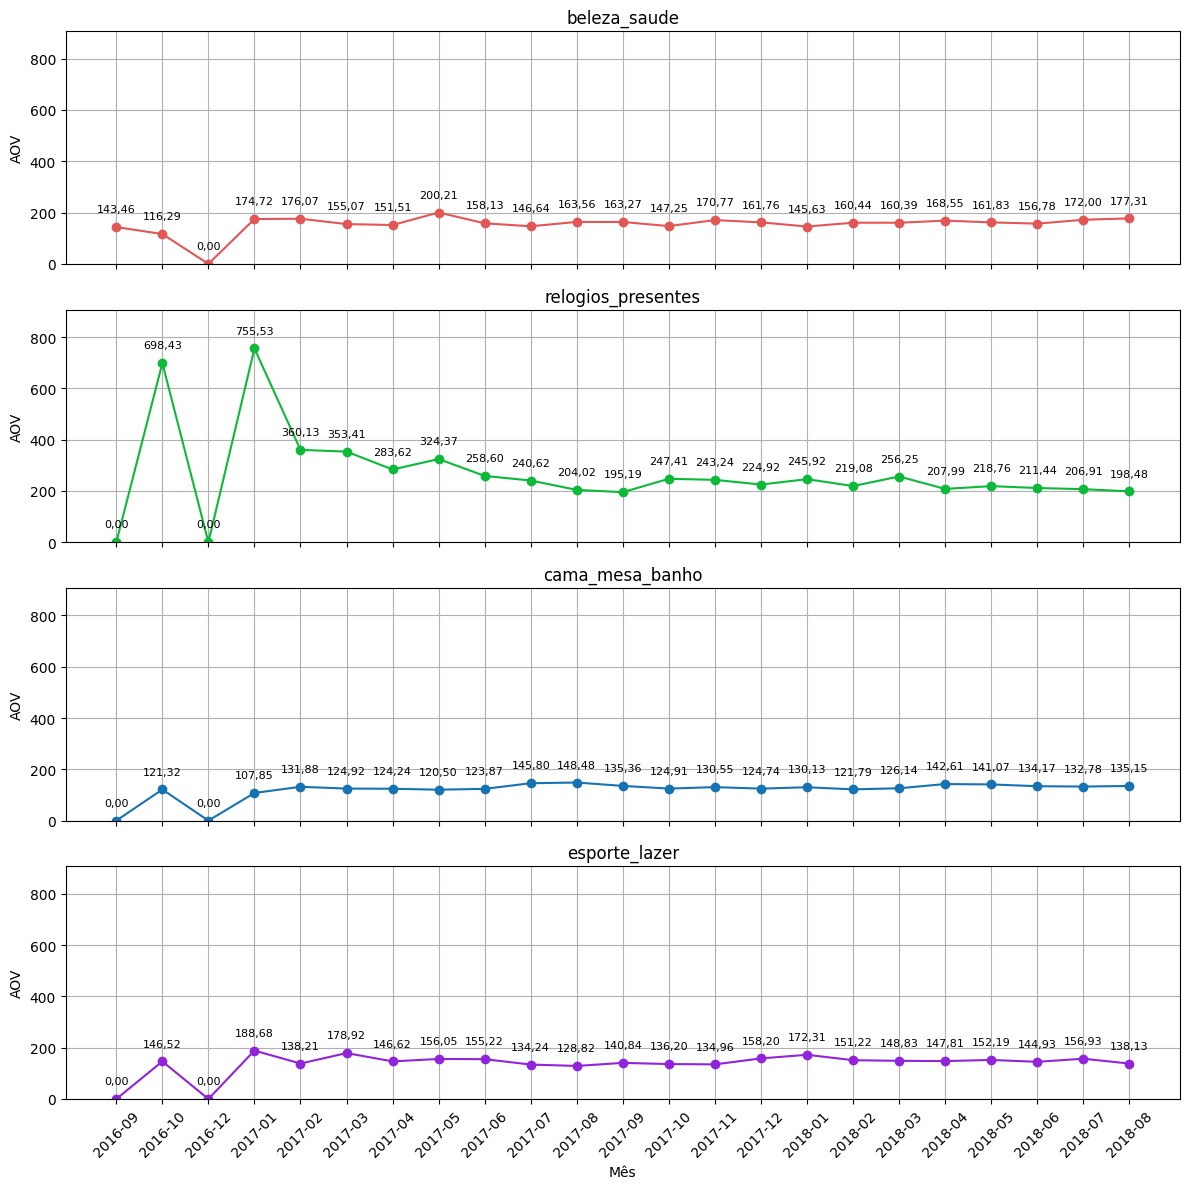

In [682]:
num_categorias = len(aov_top4.columns)
fig, axs = plt.subplots(num_categorias, 1, figsize=(12, 3*num_categorias), sharex=True)
y_maximo = aov_top4.max().max()

cores = ["#e25656","#0db938","#1573b3","#9124da"]
for i, categoria in enumerate(aov_top4.columns):
    axs[i].plot(aov_top4.index.astype(str), aov_top4[categoria], marker='o', color=cores[i])
    axs[i].set_title(categoria)
    axs[i].set_ylabel('AOV')
    axs[i].set_ylim(0,y_maximo * 1.2)
    axs[i].grid(True)

    for x, y in zip(aov_top4.index.astype(str), aov_top4[categoria]):
        axs[i].text(x, y+50, f'{y:.2f}'.replace('.',','), ha='center', va='bottom', fontsize=8)

plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### O quão preciso são as datas estimadas de entrega?

In [683]:
entregas = df[['order_id','order_purchase_timestamp','order_estimated_delivery_date','order_delivered_customer_date']].copy()
entregas['order_estimated_delivery_date'] = pd.to_datetime(entregas['order_estimated_delivery_date']).dt.normalize()
entregas['order_delivered_customer_date'] = pd.to_datetime(entregas['order_delivered_customer_date']).dt.normalize()

entregas['Entregue na hora?'] = np.where(
    entregas['order_delivered_customer_date'] <= entregas['order_estimated_delivery_date'],
    'Sim',
    'Não'
)

print(f"{round(entregas[entregas['Entregue na hora?'] == 'Sim'].size / entregas.size *100,2)}%")

91.31%


In [684]:
entregas['dias_diferenca'] = (entregas['order_delivered_customer_date'] - entregas['order_estimated_delivery_date'])
entregas['dias_diferenca'].sort_values()

2429     -147 days
79686    -140 days
95580    -135 days
77879    -124 days
25858    -109 days
            ...   
102019         NaT
102061         NaT
102136         NaT
102178         NaT
102214         NaT
Name: dias_diferenca, Length: 102425, dtype: timedelta64[ns]

In [685]:
entregas['dias_diferenca'].dt.days.quantile([0.01, 0.05])
# 99% dos pedidos foram entregues no máximo 36 antes da data estimada, 
# portanto usaremos '36' dias como a data limite antes de considerar 
# uma estimativa de entrega como inconsistente

0.01   -36.0
0.05   -27.0
Name: dias_diferenca, dtype: float64

In [686]:
status = [
    entregas['dias_diferenca'] <= pd.Timedelta(-36, 'D'),
    entregas['dias_diferenca'] <= pd.Timedelta(-10, 'D'),
    entregas['dias_diferenca'] < pd.Timedelta(0, 'D'),
    entregas['dias_diferenca'] == pd.Timedelta(0, 'D'),
    entregas['dias_diferenca'] <= pd.Timedelta(3, 'D'),
    entregas['dias_diferenca'] <= pd.Timedelta(7, 'D'),
    entregas['dias_diferenca'] >= pd.Timedelta(8, 'D')
]

valores = ['inconsistente','Bem adiantado','Adiantado','No prazo', 'Pouco atraso', 'Atrasado','Muito atraso']


entregas['status da entrega'] = np.select(status, valores)
entregas

,order_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,Entregue na hora?,dias_diferenca,status da entrega
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-29,2017-09-20,Sim,-9 days,Adiantado
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,2017-05-15,2017-05-12,Sim,-3 days,Adiantado
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,2018-02-05,2018-01-22,Sim,-14 days,Bem adiantado
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,2018-08-20,2018-08-14,Sim,-6 days,Adiantado
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,2017-03-17,2017-03-01,Sim,-16 days,Bem adiantado
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,2018-05-18,2018-05-10,Sim,-8 days,Adiantado
102421,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,2018-08-01,2018-07-23,Sim,-9 days,Adiantado
102422,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,2017-11-10,2017-10-28,Sim,-13 days,Bem adiantado
102423,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,2017-08-25,2017-08-16,Sim,-9 days,Adiantado


In [687]:
entregas['status da entrega'].value_counts()

status da entrega
Bem adiantado    63519
Adiantado        27569
Muito atraso      2908
0                 2237
Pouco atraso      1905
Atrasado          1852
No prazo          1330
inconsistente     1105
Name: count, dtype: int64

In [688]:
entregas = entregas.dropna(subset=['dias_diferenca'])
entregas['status da entrega'].value_counts()

status da entrega
Bem adiantado    63519
Adiantado        27569
Muito atraso      2908
Pouco atraso      1905
Atrasado          1852
No prazo          1330
inconsistente     1105
Name: count, dtype: int64

In [689]:
dados_entregas = entregas.loc[:,['Entregue na hora?','dias_diferenca','status da entrega']]
dados_entregas.head()

,Entregue na hora?,dias_diferenca,status da entrega
0,Sim,-9 days,Adiantado
1,Sim,-3 days,Adiantado
2,Sim,-14 days,Bem adiantado
3,Sim,-6 days,Adiantado
4,Sim,-16 days,Bem adiantado


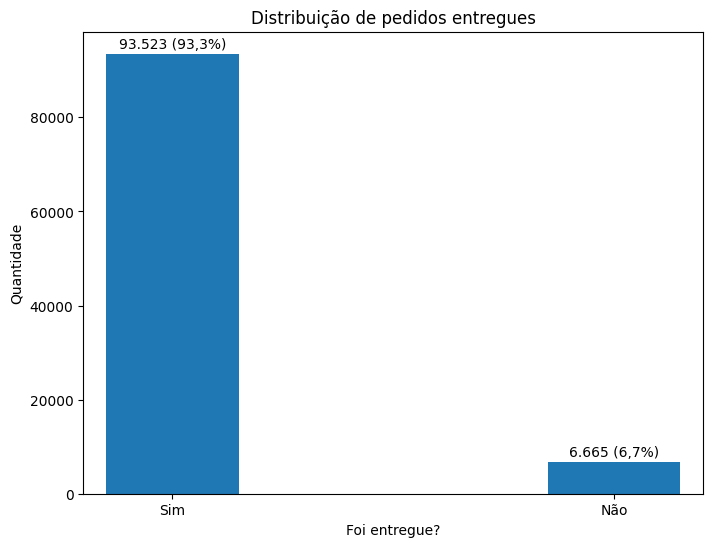

In [690]:
fig, ax = plt.subplots(figsize=(8,6))

valores_entregue =  entregas['Entregue na hora?'].value_counts()
porcentagem = valores_entregue / valores_entregue.sum() * 100

grafico = ax.bar(valores_entregue.index, 
          valores_entregue.values,
          width = 0.3)



ax.bar_label(grafico,padding = 2, labels=[f'{v:,}'.replace(',', '.') + f' ({p:.1f}%)'.replace('.',',') for v,p in zip(valores_entregue.values,porcentagem)])
ax.set_title('Distribuição de pedidos entregues')
ax.set_xlabel('Foi entregue?')
ax.set_ylabel('Quantidade')
ax.margins(x=0.04)

plt.show()

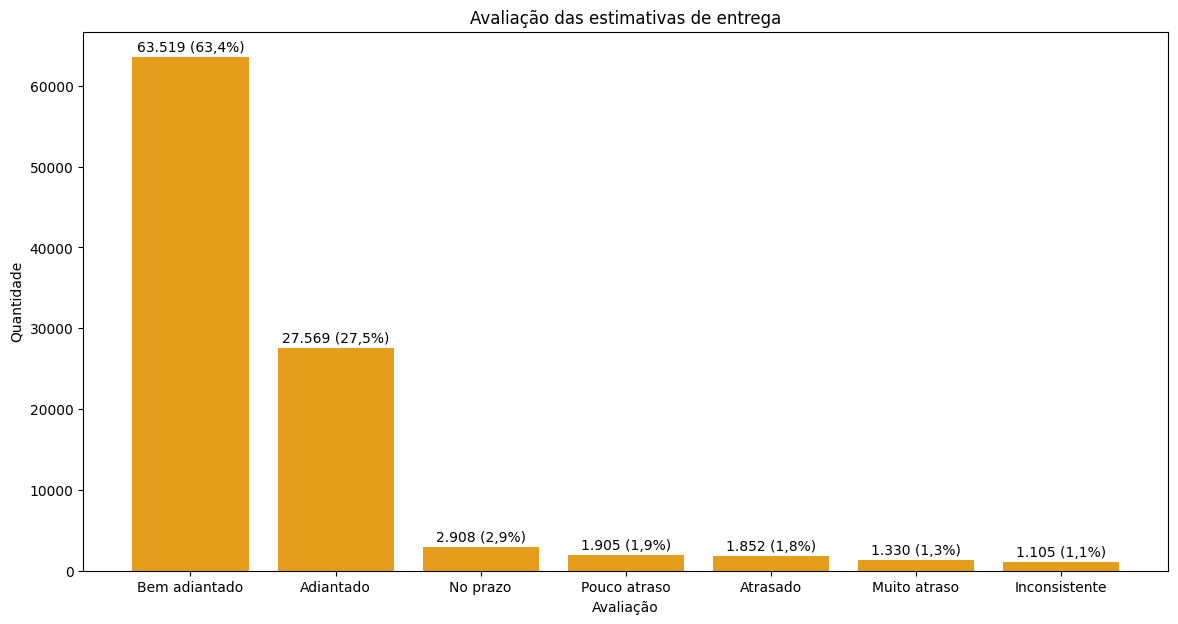

In [691]:
fig, ax = plt.subplots(figsize=(14,7))

valores_status = dados_entregas['status da entrega'].value_counts()
porcentagem_status = valores_status / valores_status.sum() * 100
grafico_status = ax.bar(valores_status.index, 
          valores_status.values,
          width = 0.8,
          color="#e49e1b")

ax.bar_label(grafico_status, padding=2,labels=[f'{v:,}'.replace(',', '.') + f' ({p:.1f}%)'.replace('.',',') for v,p in zip(valores_status.values,porcentagem_status)])
ax.set_title('Avaliação das estimativas de entrega')
ax.set_xlabel('Avaliação')
ax.set_ylabel('Quantidade')

categorias = [
    'Bem adiantado',
    'Adiantado',
    'No prazo',
    'Pouco atraso',
    'Atrasado',
    'Muito atraso',
    'Inconsistente'
]
ax.set_xticks(range(len(categorias)))
ax.set_xticklabels(categorias)

plt.show()